## importing the libraries

In [81]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

## Loading data

In [82]:
#reading thr file
pd.read_csv("houses.csv")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [83]:
houses = pd.read_csv("houses.csv")

In [84]:
houses.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [85]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Data cleansing process

In [7]:
#checking for the sum of null values
houses.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
#checking for the sum of duplicated values
houses.duplicated().sum()

0

**just to have an idea of how the features look like**

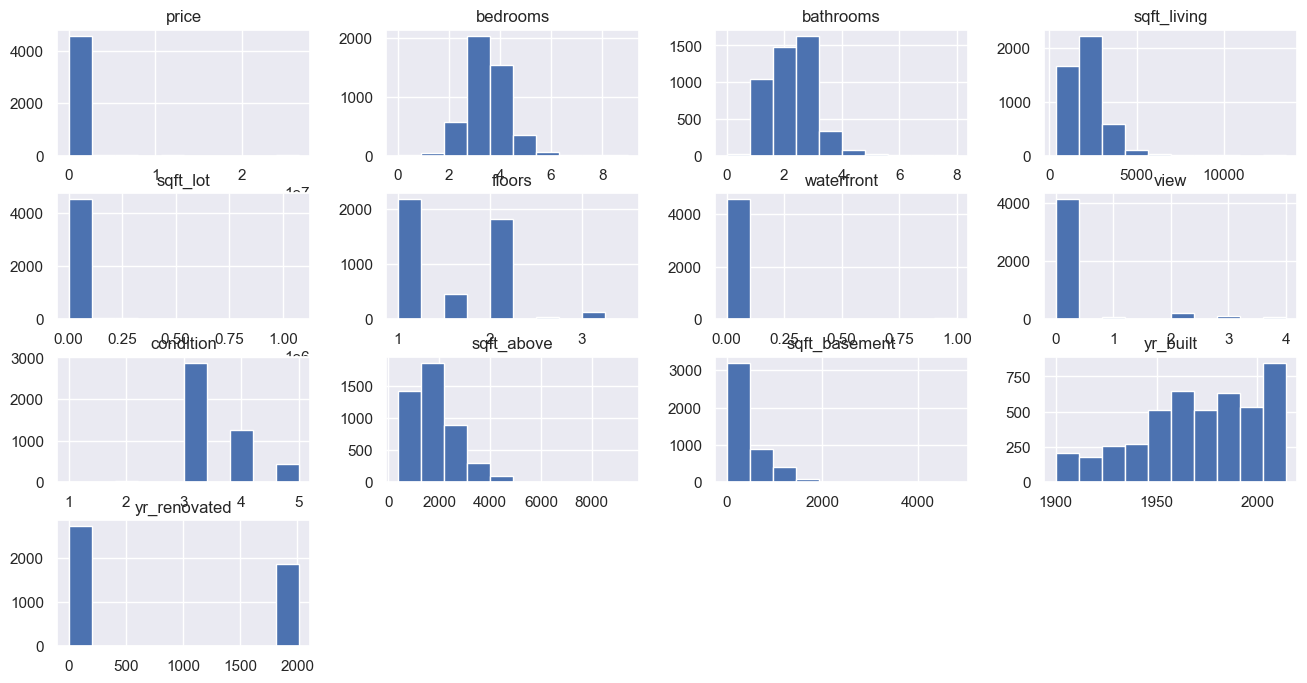

In [11]:
houses.hist(figsize=(16,8),bins=10)
plt.show()

After looking and thinking about my data, there are some columns I decided not to work with because
most of the time people buying houses don't neccessarily care about these

In [12]:

houses.drop(['waterfront'],axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [35]:
#dropping columns i don't need
del houses['waterfront']

KeyError: 'waterfront'

In [37]:
del houses['view']

In [98]:

del houses['country']

In [96]:
del houses['statezip']

In [41]:
del houses['street']

In [ ]:
del houses['city']

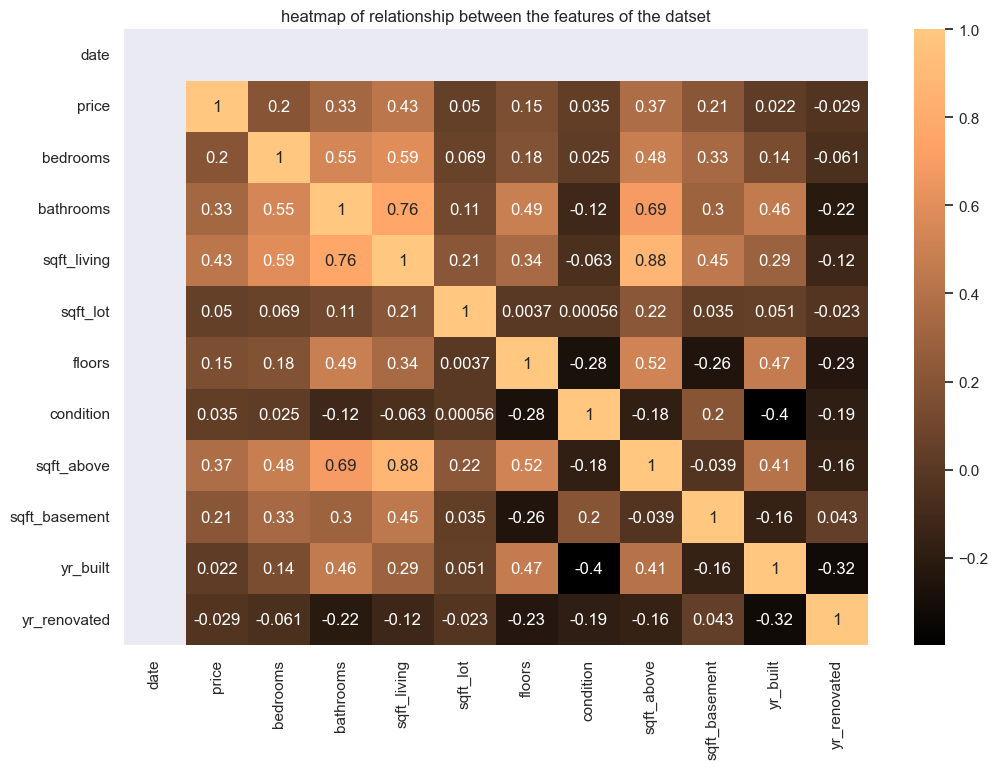

In [42]:
# now visualizing the correlation between the price and other features

plt.figure(figsize=(12,8))
sns.heatmap(houses.corr(), cmap=plt.cm.copper,annot=True)
plt.title('heatmap of relationship between the features of the datset', fontsize = 12)
plt.show()

In [44]:
#calculating some statistical data
houses.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.0,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,0.0,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.0,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,0.0,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,0.0,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,0.0,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,0.0,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The bedroom columns is weird with some houses with 46 bedrooms which seems to be too much or for a mansion?
Maximum square feet is 13,450 where as the minimum is 290. we can see that the data is distributed.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

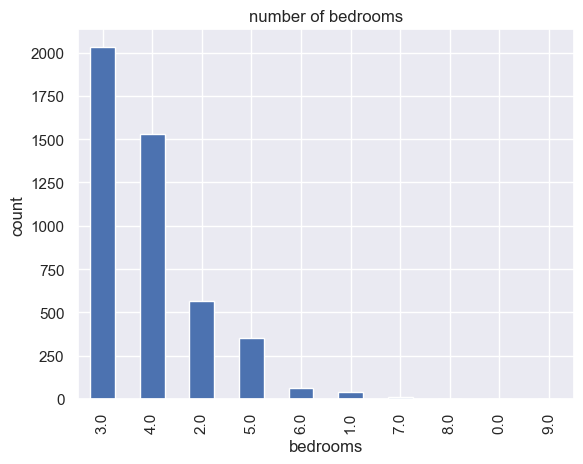

In [45]:
# Which is the most common house (Bedroom wise) ?

houses['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom

## How common factors are affecting the price of the houses ?

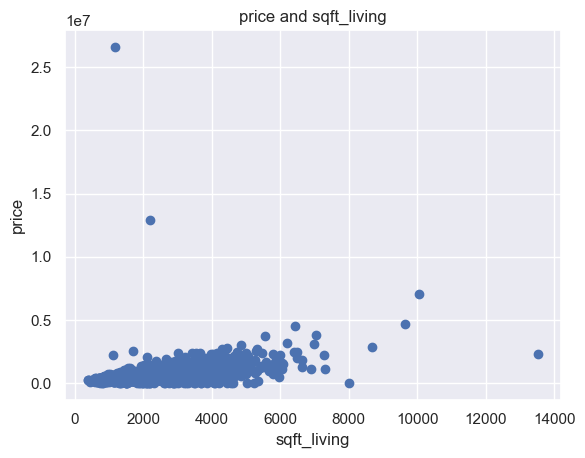

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [46]:
#I will see if the price is affected by sqft_living
plt.scatter(houses.sqft_living, houses.price)
plt.title("price and sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()
sns.despine


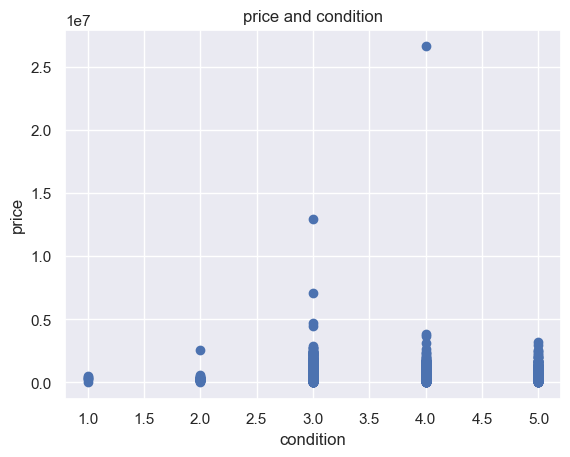

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [47]:
#I will see if the price is affected by conditions
plt.scatter(houses.condition,houses.price)
plt.title("price and condition")
plt.xlabel('condition')
plt.ylabel('price')
plt.show()
sns.despine

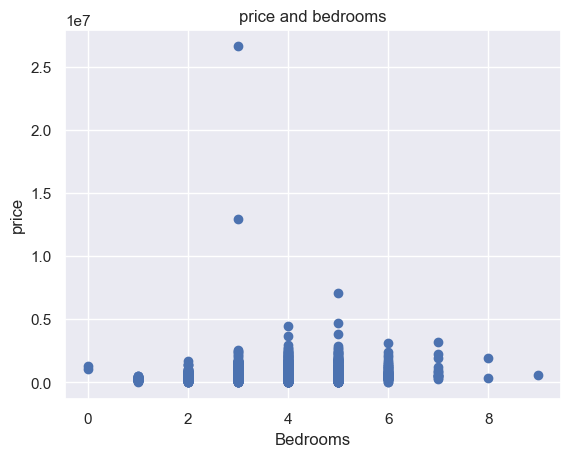

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [48]:
#I will see if the price is affected by bedrooms
plt.scatter(houses.bedrooms,houses.price)
plt.title("price and bedrooms")
plt.xlabel('Bedrooms')
plt.ylabel('price')
plt.show()
sns.despine

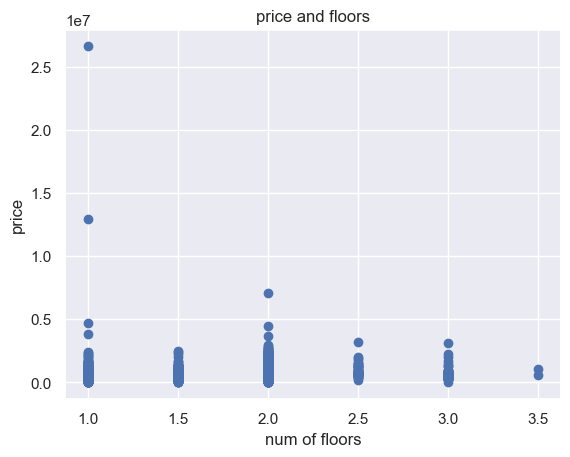

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [49]:
#I will see if the price is affected by the number of floors
plt.scatter(houses.floors,houses.price )
plt.title("price and floors")
plt.xlabel('num of floors')
plt.ylabel('price')
plt.show()
sns.despine

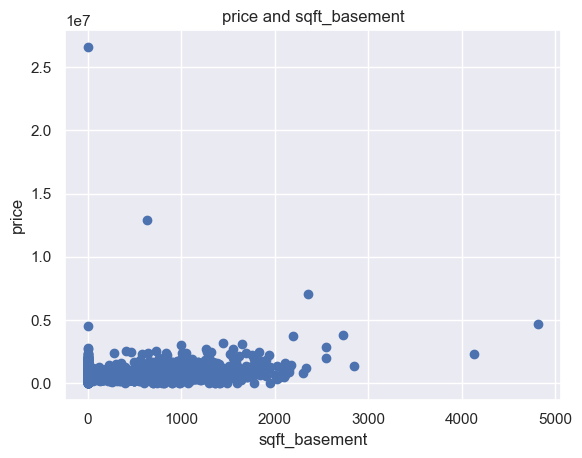

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [50]:
#I will see if the price is affected by sqft_basement
plt.scatter(houses.sqft_basement,houses.price)
plt.title("price and sqft_basement")
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.show()
sns.despine

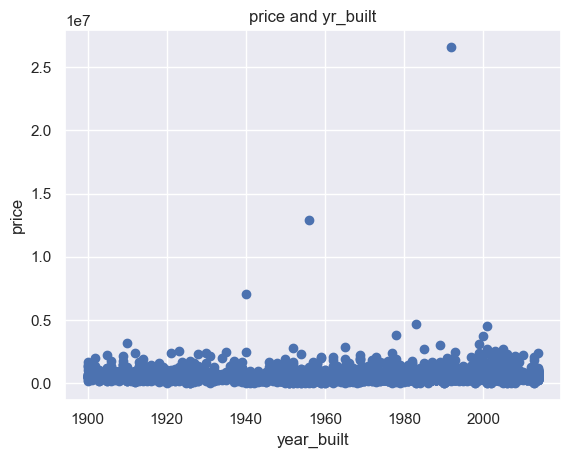

In [51]:
#I will see if the price is affected by yr_built
plt.scatter(houses.yr_built,houses.price)
plt.title("price and yr_built")
plt.xlabel('year_built')
plt.ylabel('price')
plt.show()
#sns.despine

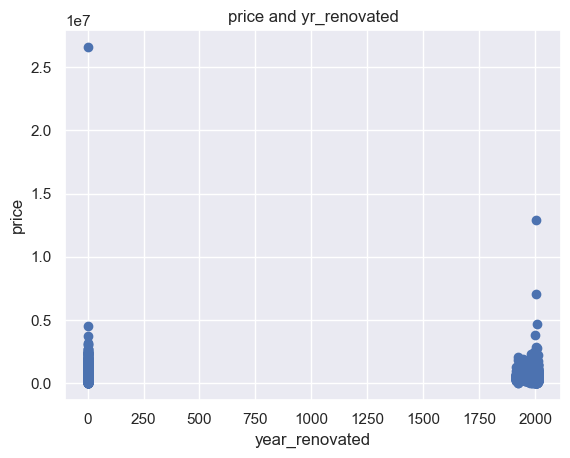

In [52]:
#I will see if the price is affected by yr_renovated
plt.scatter(houses.yr_renovated,houses.price)
plt.title("price and yr_renovated")
plt.xlabel('year_renovated')
plt.ylabel('price')
plt.show()

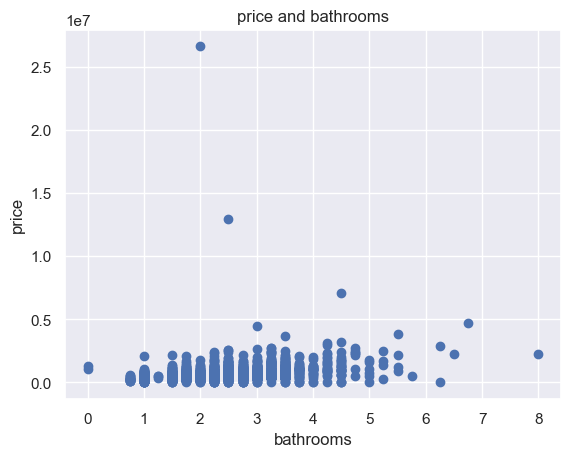

In [53]:
#I will see if the price is affected by bathrooms
plt.scatter(houses.bathrooms,houses.price)
plt.title("price and bathrooms")
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

In [86]:
del houses['city']

In [94]:
del houses['street']

In [99]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


## Linear regression Models

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
reg = LinearRegression()

In [102]:
labels = houses['price']
conv_dates = [1 if values == 2014 else 0 for values in houses.date ]
houses['date'] = conv_dates
train1 = houses.drop(['price'],axis=1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [105]:
reg.fit(x_train,y_train)

LinearRegression()

In [106]:
reg.score(x_test,y_test)

0.6018955193358874

## After i notice the accuracy score was a bit low i decided to use a different method to see if i could atleast get more than 85%

 ### Gradient boosting

In [111]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.2, loss = 'ls')

In [112]:
clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, loss='ls', max_depth=5)

In [113]:
clf.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, loss='ls', max_depth=5)

In [114]:
clf.score(x_test,y_test)

0.51541316905803

### I will try to fit a ridge regression model and see if I can get a higher accuracy

In [119]:
ridge = Ridge(alpha=.01)
ridge.fit(x_train,y_train)  # fit the model with the training data

Ridge(alpha=0.01)

In [122]:
ridge_pred = ridge.predict(x_test)  # make predictions

In [124]:
# score the model to check the accuracy

print('Test score: {}\n'.format(ridge.score(x_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))


Test score: 0.6018879701331217

Overall model accuracy: 0.6018879701331217



### Okay I will now try to tune the parameters of the ridge model for a better accuracy


In [125]:
ridge_model = Ridge()

In [250]:
param = {'alpha':[2,2.1,2.56,2.2899,0]}  # define the parameters

In [251]:
# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=7,n_jobs=-1)


In [252]:
ridge_search.fit(x_train,y_train)   # fit the model 

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [2, 2.1, 2.56, 2.2899, 0]})

In [253]:
# print out the best parameter for ridge and score it on the test and train data

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(x_train,y_train)))
print('Test score: {}'.format(ridge_search.score(x_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))


Best parameter found:
{'alpha': 2.56}
Train score: 0.20204350253545145

Test score: 0.6001060186481617
Overall model accuracy: 0.6018879701331217



In [254]:
# i move on to using the ensemble methods for the regression

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [255]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [256]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))


Best parameter found:
{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 5}

Train score: 0.1616644806660965

Test score: 0.4839594218100459

Overall model accuracy: 0.4839594218100459



In [257]:
# decided to try random forest regressor model
#add n estimators parameters from previous parameters dictionary
forest = RandomForestRegressor()

#  add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

#initialise the grid search
forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,    
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  #here i fit the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [258]:
# make a prediction with the model

# will print the best parameters and the scores for test train and accuracy

forest_prediction = forest_search.predict(xtest)

print('Best parameter: \n{}\n'.format(forest_search.best_params_))


Best parameter: 
{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 7}



In [259]:
print('Overall Accuracy: \n{}\n'.format(r2_score(ytest,forest_prediction )))

Overall Accuracy: 
0.4455250783679855



## creating the app with streamlit

In [272]:
import streamlit as st
import pandas as pd
import numpy as np

In [271]:
st.title('House price Predictions with Cyndie')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)